# **Dimensionality Reduction**

En `video-features.ipynb` se pudo extraer las caracteristicas de los videos del dataset `test_subset_10.csv`, `train_subset_10.csv` y `val_subset_10.csv`, de manera que, cada vector característico se almacenó en un archivo `${youtube_id}.npy`(dentro de la carpeta 'extraction')

## **Load packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE

## **Load datasets**

In [2]:
train_path = "./data/train_subset_10.csv"
val_path = "./data/val_subset_10.csv"
test_path = "./data/test_subset_10.csv"

train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

## **Useful functions**

In [3]:
def get_X_y_id(path: str, df:pd.DataFrame, is_train:bool=True, type:str="mean"):

    """
    Description:
        This function returns the feature_vectors, labels an ids of the videos

    Args: 
        path (str): the path to the directory where the videos are located
        df (pd.DataFrame): a DataFrame of Pandas, could be train_df, val_df or test_df
        is_train (bool): if True, the function returns the feature_vectors, labels an ids of the videos
        type (str): the type of feature to extract from the videos, could be "mean" or "max"

    """

    feature_vectors = []
    labels = []
    ids = []

    for video in Path(path).glob('*.npy'):
        
        id = os.path.basename(video).split('_')[0]

        if id not in df['youtube_id'].values:
            continue

        current_video = np.load(video)

        if len(current_video.shape) <= 1:
            continue
        
        if type == "mean":
            feature_vectors.append(np.mean(current_video, axis = 0))
        elif type == "max":
            feature_vectors.append(np.max(current_video, axis = 0))
        ids.append(id)

        if is_train:
            labels.append(df[df['youtube_id'] == id]['label'].values[0])

    feature_vectors = pd.DataFrame(np.vstack(feature_vectors))
    ids = pd.DataFrame({'youtube_id': ids})
    
    if is_train:
        labels = pd.DataFrame(np.vstack(labels))
        return feature_vectors, labels, ids
    else:
        return feature_vectors, ids


In [4]:
path_train = './extraction/train/r21d/r2plus1d_18_16_kinetics'
path_val = './extraction/val/r21d/r2plus1d_18_16_kinetics'
path_test = './extraction/test/r21d/r2plus1d_18_16_kinetics'

In [5]:
X_train, y_train, ids_train = get_X_y_id(path_train, train_df, type='mean')
X_val, y_val, ids_val = get_X_y_id(path_val, val_df, type='mean')
X_test, ids_test = get_X_y_id(path_test, test_df, False, type='mean')

In [6]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.983179,0.327599,0.782543,1.001214,1.577275,0.340752,1.618470,1.223442,0.823669,0.681321,...,0.737517,0.705552,1.096622,0.711036,0.974399,0.668527,0.925978,0.582594,1.312039,2.023441
1,1.061987,0.605783,0.573484,0.550123,1.083703,0.436514,0.986723,0.237259,0.870769,0.636464,...,0.710814,1.498515,0.875496,1.125336,2.201024,1.377259,1.261040,0.406046,0.522262,0.986933
2,2.448404,1.147437,1.186966,0.792676,0.788874,0.292240,0.791563,0.512280,0.616745,0.588685,...,1.055853,1.433681,2.381611,0.469194,0.610362,2.227937,1.419250,0.234973,0.533393,0.299416
3,0.312113,0.368528,0.241799,0.789037,0.732306,0.635243,1.188323,0.714574,1.577718,1.490716,...,1.056502,0.055957,1.616206,1.442354,0.660173,0.921523,0.043679,0.595073,1.019820,0.219829
4,0.232415,0.736968,0.989492,0.516418,0.407583,0.240481,0.723166,1.121362,0.571783,0.914052,...,0.694645,0.176282,0.564752,1.375056,0.592111,0.756491,0.426875,0.457333,1.180734,0.757165


In [7]:
y_val.head()

,0
0,flipping pancake
1,wrapping present
2,stretching leg
3,stretching leg
4,shot put


In [8]:
ids_val.head()

,youtube_id
0,--33Lscn6sk
1,-0WZKTu0xNk
2,-2VKVjgNuE0
3,-2VXhGGeOWg
4,-2zDnjMmI5U


De esta manera, la fila 0 de X, y, id se corresponden, lo mismo para la fila 1, 2, ...

In [9]:
print(f"Shape de la matriz de training: {X_train.shape}")
print(f"Size de los labels de training: {y_train.shape}")
print(f"Size de los ids de training: {ids_train.shape}\n")

print(f"Shape de la matriz de validation: {X_val.shape}")
print(f"Size de los labels de validation: {y_val.shape}")
print(f"Size de los ids de validation: {ids_val.shape}\n")

print(f"Shape de la matriz de testing: {X_test.shape}")
print(f"Size de los ids de testing: {ids_test.shape}")


Shape de la matriz de training: (5414, 512)
Size de los labels de training: (5414, 1)
Size de los ids de training: (5414, 1)

Shape de la matriz de validation: (426, 512)
Size de los labels de validation: (426, 1)
Size de los ids de validation: (426, 1)

Shape de la matriz de testing: (805, 512)
Size de los ids de testing: (805, 1)


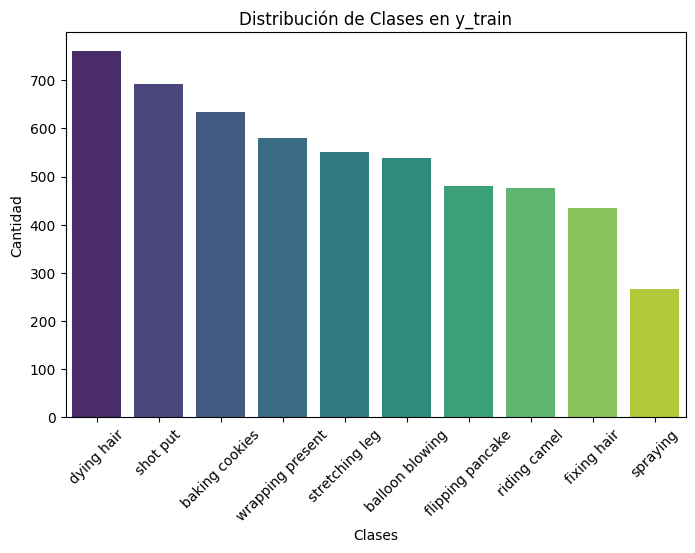

In [10]:
class_counts = y_train.iloc[:, 0].value_counts() 

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="viridis", legend=False)
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.title("Distribución de Clases en y_train")
plt.xticks(rotation=45)
plt.show()

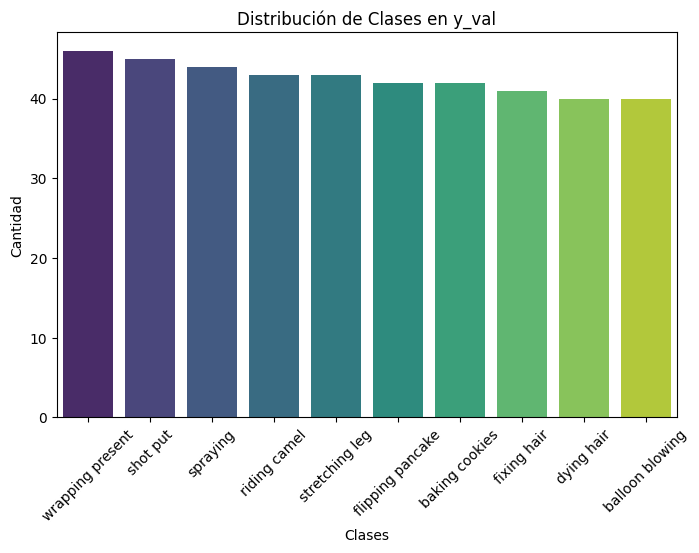

In [11]:
class_counts = y_val.iloc[:, 0].value_counts() 

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="viridis", legend=False)
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.title("Distribución de Clases en y_val")
plt.xticks(rotation=45)
plt.show()

Como se observó cierto desbalance en las clases de X_train, y_train. se decidió aplicar `oversampling`

Distribución de clases después de SMOTE:


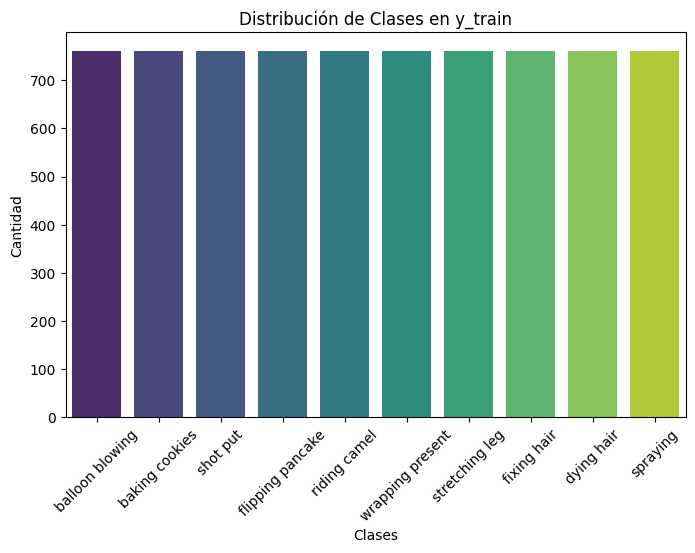

In [24]:
# oversampling

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Distribución de clases después de SMOTE:")

class_counts = y_train.iloc[:, 0].value_counts() 

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="viridis", legend=False)
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.title("Distribución de Clases en y_train")
plt.xticks(rotation=45)
plt.show()

## **Utils: Save and load processed (averaged) features**

Guardar los features promediados en archivos npz, para poder cargarlos cada vez que se necesiten.

In [12]:
def save_df_as_npz(directory:str, filename:str, features:pd.DataFrame, ids, labels=None):
    """
    Description:
        This function saves the feature vectors, ids and labels as npz files.
        Ej: en test.npz estará una matriz con los features y un array con sus
        respectivas labels.

    Args: 
        features (pd.DataFrame): the feature vectors
        labels (pd.DataFrame): the labels
        directory (str): the directory where the npz files will be saved
        filename (str): the name of the npz file

    """
    features = features.to_numpy()
    ids = ids.to_numpy()
    if labels is not None:
        labels= labels.to_numpy()
        np.savez(os.path.join(directory, filename), features=features, ids=ids, labels=labels)
    else:
        np.savez(os.path.join(directory, filename), features=features, ids=ids)

def load_features_ids_labels(filename:str, has_labels=True):
    """
    Description:
        Cargar los features, ids y labels de un archivo npz.
        Si es data de testeo, has_labels=False
    """
    contents = np.load(filename, allow_pickle=True)
    features = contents['features']
    ids = contents['ids']
    if has_labels:
        labels = contents['labels']
        return features, ids, labels
    return features, ids

In [13]:
# Guardar (crear carpeta 'features_np' si no existe)
# Validation
save_df_as_npz(features=X_val, ids=ids_val, labels=y_val, directory='features_np', filename='features_val.npz')
# Test
save_df_as_npz(directory='features_np', filename='features_test.npz', features=X_test, ids=ids_test)
# Train
save_df_as_npz(directory='features_np', filename='features_train.npz', features=X_train, ids=ids_train, labels=y_train)


In [14]:
# Ejemplo para cargar los features guardados
X_train_np, ids_train_np, y_train_np = load_features_ids_labels(filename='features_np/features_train.npz', has_labels=True)
X_val_np, ids_val_np, y_val_np = load_features_ids_labels(filename='features_np/features_val.npz', has_labels=True)
X_test_np, ids_test_np = load_features_ids_labels(filename='features_np/features_test.npz', has_labels=False)

## **Reduce dimensionality**

Con los features ya procesados, se probarán técnicas de reducción de dimensionalidad (**t-SNE y UMAP**). Antes de esto se hará normalización de los datos, esto es fundamental, ya que las técnicas de reducción de dimensionalidad que se usarán dependen de distancias entre puntos. Si las características de los datos tienen escalas muy diferentes, las que tengan mayores valores pueden dominar el cálculo de distancias y distorsionar los resultados. 

Al normalizar los datos, aseguramos que todas las características contribuyan de manera equitativa, mejorando la precisión y relevancia de las visualizaciones obtenidas con **t-SNE** o **UMAP**.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val_np)
X_test_scaled = scaler.transform(X_test_np)

Ahora se transformarán las etiquetas de `y_train` en valores numéricos discretos, será util al momento de graficar

In [16]:
train_numeric_labels, class_names = pd.factorize(y_train_np.ravel())  

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import umap

c:\Users\nayel\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **t-SNE**

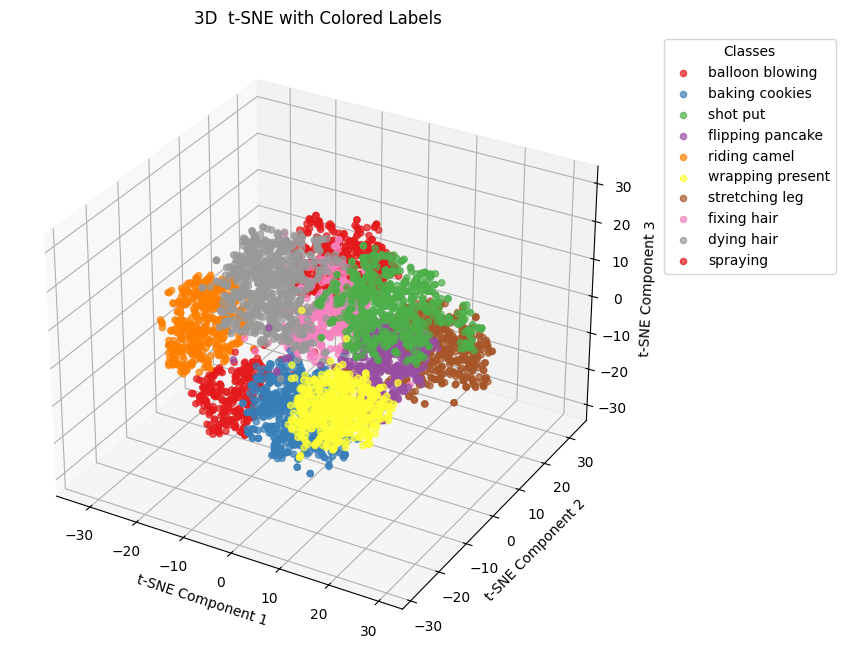

In [24]:
tsne = TSNE(n_components=3, learning_rate='auto', init='random', random_state=0, perplexity=10)
train_tsne = tsne.fit_transform(X_train_scaled)
unique_labels = np.unique(train_numeric_labels)
palette = sns.color_palette("Set1", len(unique_labels))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(unique_labels):
    mask = train_numeric_labels == label
    ax.scatter(train_tsne[mask, 0], train_tsne[mask, 1], train_tsne[mask, 2], 
               color=palette[i], label=class_names[label], alpha=0.7)

ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")
ax.set_title('3D  t-SNE with Colored Labels')

ax.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### **UMAP**

c:\Users\nayel\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


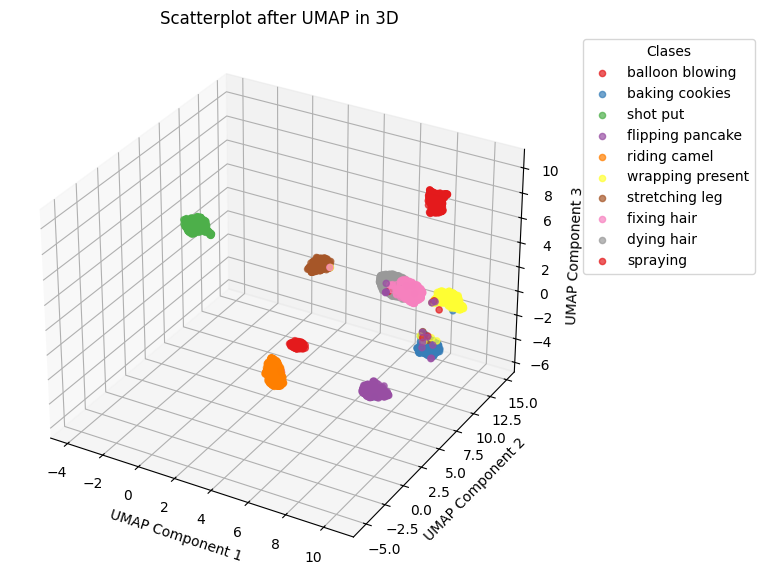

In [19]:
umap_reducer = umap.UMAP(n_components=3, random_state=42)
train_umap = umap_reducer.fit_transform(X_train_scaled)

unique_labels = np.unique(train_numeric_labels)
palette = sns.color_palette("Set1", len(unique_labels))  

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(unique_labels):
    mask = train_numeric_labels == label
    ax.scatter(train_umap[mask, 0], train_umap[mask, 1], train_umap[mask, 2], 
               color=palette[i], label=class_names[label], alpha=0.7)

ax.set_title('Scatterplot after UMAP in 3D')
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")
ax.set_zlabel("UMAP Component 3")
ax.legend(title="Clases", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## **Clustering**

In [25]:
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score, mutual_info_score, normalized_mutual_info_score

def calculate_clustering_metrics(X, cluster_labels, true_labels):
    
    silhouette = silhouette_score(X, cluster_labels)  # Silhouette Score
    rand_index = rand_score(true_labels, cluster_labels)  # Rand Index
    adjusted_rand = adjusted_rand_score(true_labels, cluster_labels)  # Adjusted Rand Index
    mutual_info = mutual_info_score(true_labels, cluster_labels)  # Mutual Information
    nmi = normalized_mutual_info_score(true_labels, cluster_labels)  # Normalized Mutual Information
    
    metrics = {
        "Silhouette Score": silhouette,
        "Rand Index (RI)": rand_index,
        "Adjusted Rand Index": adjusted_rand,
        "Mutual Information Score (MI)": mutual_info,
        "Normalized Mutual Information (NMI)": nmi
    }
    
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")

### **t-SNE | KMeans**

In [26]:
from kmeans_plus_plus import KMeans

num_clusters = len(np.unique(train_numeric_labels))  

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(train_tsne)

calculate_clustering_metrics(train_tsne, cluster_labels, train_numeric_labels)


Silhouette Score: 0.2884
Rand Index (RI): 0.9294
Adjusted Rand Index: 0.6505
Mutual Information Score (MI): 1.6831
Normalized Mutual Information (NMI): 0.7552


### **UMAP | KMeans**

In [ ]:
from kmeans_plus_plus import KMeans

num_clusters = len(np.unique(train_numeric_labels)) 

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(train_umap)

calculate_clustering_metrics(train_umap, cluster_labels, train_numeric_labels)



Silhouette Score: 0.7765
Rand Index (RI): 0.9903
Adjusted Rand Index: 0.9487
Mutual Information Score (MI): 2.1604
Normalized Mutual Information (NMI): 0.9512
